<a href="https://colab.research.google.com/github/vivibarragango/finaltermproject634/blob/main/DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aqui va el titulo

Descripcion

Import scikit packages

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf
import random
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.utils import to_categorical

Import visualization packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Loading the dataset

In [ ]:
DIABETES_DATASET = './input/diabetes.csv'
diabetes_df = pd.read_csv(DIABETES_DATASET)
diabetes_df.head().T

,0,1,2,3,4
Pregnancies,6.000,1.000,8.000,1.000,0.000
Glucose,148.000,85.000,183.000,89.000,137.000
BloodPressure,72.000,66.000,64.000,66.000,40.000
SkinThickness,35.000,29.000,0.000,23.000,35.000
Insulin,0.000,0.000,0.000,94.000,168.000
BMI,33.600,26.600,23.300,28.100,43.100
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288
Age,50.000,31.000,32.000,21.000,33.000
Outcome,1.000,0.000,1.000,0.000,1.000


Analyzing Outcome value

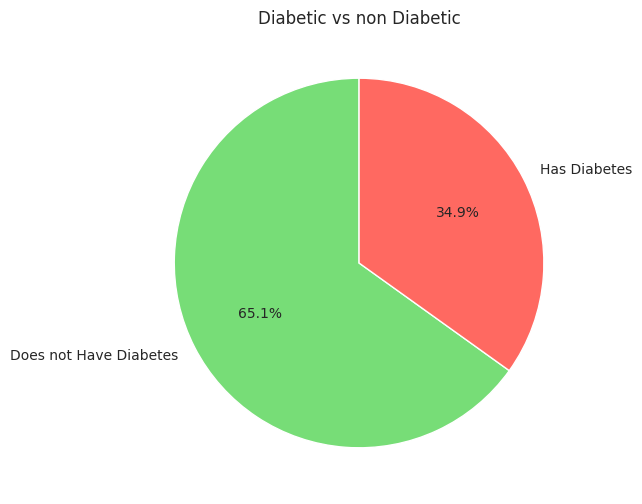

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
LABELS=['Does not Have Diabetes','Has Diabetes']
COLORS = ['#77dd77', '#ff6961']
plt.pie(diabetes_df['Outcome'].value_counts(),
        labels=LABELS, autopct='%1.1f%%',
        startangle=90,
        colors=COLORS
)
plt.title('Diabetic vs non Diabetic')
plt.show()


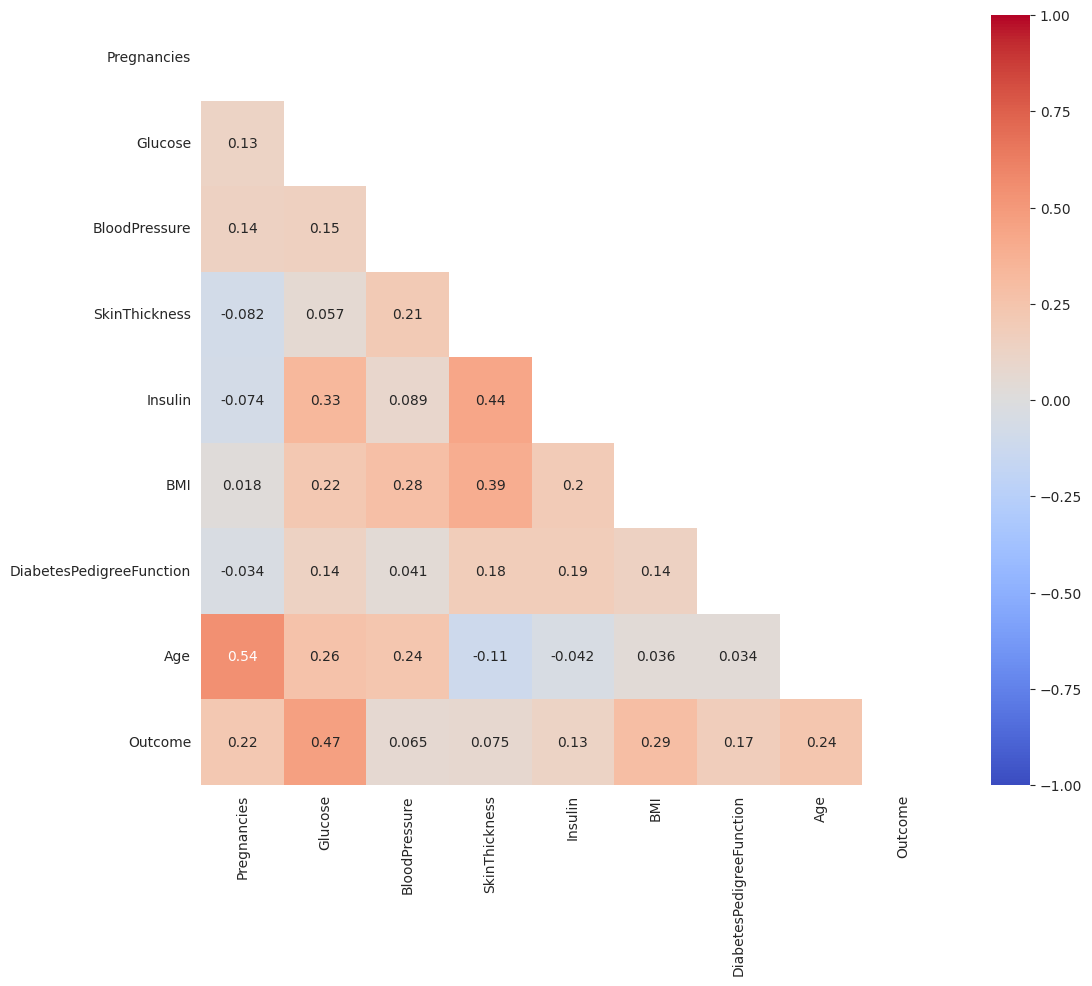

In [ ]:
numeric_df = diabetes_df.select_dtypes(include=['number'])
corr=numeric_df.corr()
plt.figure(figsize=(12,10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set_style("white")
sns.heatmap(corr, annot=True,cmap='coolwarm',vmin=-1.0,vmax=1.0,mask=mask)
plt.show()

# Dataset Splitting

In [ ]:
X = diabetes_df.drop('Outcome', axis=1).values  # Features as numpy array
y = diabetes_df['Outcome'].values
kf = KFold(n_splits=10, shuffle=True, random_state=42)





Random forest training

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_accuracies = []
rf_confussion_matrices = []
for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    rf_classifier.fit(X_train, y_train)
    # Make predictions
    y_pred = rf_classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    rf_accuracies.append(accuracy)
    conf_matrix = confusion_matrix(y_test, y_pred)
    rf_confussion_matrices.append(conf_matrix)


Decission tree training

In [ ]:
clf = DecisionTreeClassifier()
clf_accuracies = []
clf_confussion_matrices = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    clf.fit(X_train, y_train)
    # Make predictions
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    clf_accuracies.append(accuracy)
    conf_matrix = confusion_matrix(y_test, y_pred)
    clf_confussion_matrices.append(conf_matrix)


LTSM Training

Preparing the Dataset to LTSM

In [ ]:
# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

X_np = np.array(X)

X_reshaped = X_np.reshape((X_np.shape[0], 1, X_np.shape[1]))

y_categorical = to_categorical(y)



Training model

In [ ]:
lstm_accuracies = []
lstm_confussion_matrices = []
for train_index, val_index in kf.split(X_reshaped):
    X_train, X_test = X_reshaped[train_index], X_reshaped[val_index]
    y_train, y_test = y_categorical[train_index], y_categorical[val_index]
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))  # 2 because we have two classes (0 and 1)

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

    # Make predictions
    lstm_pred_prob = model.predict(X_test)
    lstm_pred = np.argmax(lstm_pred_prob, axis=1)
    lstm_test_labels = np.argmax(y_test, axis=1)

    # Evaluate the model
    accuracy = accuracy_score(lstm_test_labels, lstm_pred)
    lstm_accuracies.append(accuracy)
    conf_matrix = confusion_matrix(lstm_test_labels, lstm_pred)
    lstm_confussion_matrices.append(conf_matrix)



Epoch 1/50
18/18 [==============================] - 4s 43ms/step - loss: 0.6790 - accuracy: 0.5725 - val_loss: 0.6631 - val_accuracy: 0.6403
Epoch 2/50
18/18 [==============================] - 0s 6ms/step - loss: 0.6064 - accuracy: 0.6594 - val_loss: 0.6522 - val_accuracy: 0.6331
Epoch 3/50
18/18 [==============================] - 0s 7ms/step - loss: 0.5949 - accuracy: 0.6685 - val_loss: 0.6484 - val_accuracy: 0.6187
Epoch 4/50
18/18 [==============================] - 0s 6ms/step - loss: 0.5866 - accuracy: 0.6830 - val_loss: 0.6374 - val_accuracy: 0.6475
Epoch 5/50
18/18 [==============================] - 0s 8ms/step - loss: 0.5760 - accuracy: 0.6975 - val_loss: 0.6364 - val_accuracy: 0.6835
Epoch 6/50
18/18 [==============================] - 0s 6ms/step - loss: 0.5717 - accuracy: 0.7047 - val_loss: 0.6348 - val_accuracy: 0.6043
Epoch 7/50
18/18 [==============================] - 0s 9ms/step - loss: 0.5645 - accuracy: 0.6902 - val_loss: 0.6153 - val_accuracy: 0.6691
Epoch 8/50
18/18 [=

3/3 [==============================] - 0s 5ms/step
Epoch 1/50
18/18 [==============================] - 4s 74ms/step - loss: 0.6555 - accuracy: 0.6159 - val_loss: 0.6411 - val_accuracy: 0.6403
Epoch 2/50
18/18 [==============================] - 0s 7ms/step - loss: 0.5824 - accuracy: 0.6920 - val_loss: 0.6209 - val_accuracy: 0.6547
Epoch 3/50
18/18 [==============================] - 0s 6ms/step - loss: 0.5676 - accuracy: 0.6957 - val_loss: 0.6105 - val_accuracy: 0.6475
Epoch 4/50
18/18 [==============================] - 0s 7ms/step - loss: 0.5853 - accuracy: 0.6848 - val_loss: 0.6258 - val_accuracy: 0.6043
Epoch 5/50
18/18 [==============================] - 0s 7ms/step - loss: 0.5583 - accuracy: 0.7138 - val_loss: 0.5979 - val_accuracy: 0.6906
Epoch 6/50
18/18 [==============================] - 0s 7ms/step - loss: 0.5625 - accuracy: 0.6866 - val_loss: 0.6086 - val_accuracy: 0.6547
Epoch 7/50
18/18 [==============================] - 0s 7ms/step - loss: 0.5444 - accuracy: 0.7083 - val_loss

3/3 [==============================] - 0s 5ms/step
Epoch 1/50
18/18 [==============================] - 3s 39ms/step - loss: 0.6474 - accuracy: 0.6268 - val_loss: 0.6459 - val_accuracy: 0.5899
Epoch 2/50
18/18 [==============================] - 0s 6ms/step - loss: 0.6099 - accuracy: 0.6812 - val_loss: 0.6462 - val_accuracy: 0.5971
Epoch 3/50
18/18 [==============================] - 0s 7ms/step - loss: 0.5843 - accuracy: 0.7011 - val_loss: 0.6317 - val_accuracy: 0.6115
Epoch 4/50
18/18 [==============================] - 0s 7ms/step - loss: 0.5797 - accuracy: 0.6612 - val_loss: 0.6214 - val_accuracy: 0.6403
Epoch 5/50
18/18 [==============================] - 0s 6ms/step - loss: 0.5799 - accuracy: 0.6685 - val_loss: 0.6055 - val_accuracy: 0.6978
Epoch 6/50
18/18 [==============================] - 0s 7ms/step - loss: 0.5838 - accuracy: 0.6920 - val_loss: 0.6034 - val_accuracy: 0.6547
Epoch 7/50
18/18 [==============================] - 0s 7ms/step - loss: 0.5531 - accuracy: 0.6975 - val_loss

Calculating Metrics

In [ ]:
def calculate_metrics(conf_matrix, _accuracy):
    tn, fp, fn, tp = conf_matrix.ravel()
    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    hss = 2 * ((tp * tn) - (fp * fn)) / ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn))
    bacc = 0.5 * ((tp / (tp + fn)) + (tn / (tn + fp)))
    brier_score = (fp + fn) / (tp + tn + fp + fn)
    tpr = tp / (tp + fn)
    tnr = tn / (tn + fp)
    fpr = fp / (fp + tn)
    fnr = fn / (fn + tp)
    accuracy = _accuracy
    return (tn, fp, fn, tp, tss, hss, bacc, brier_score, tpr, tnr, fpr, fnr, accuracy)

Formatting results

In [ ]:
# Calculate metrics for each confusion matrix
lstm_metrics = [calculate_metrics(lstm_confussion_matrices[i],lstm_accuracies[i]) for i in range(len(lstm_confussion_matrices))]
rf_metrics = [calculate_metrics(rf_confussion_matrices[i],rf_accuracies[i]) for i in range(len(rf_confussion_matrices))]
clf_metrics = [calculate_metrics(clf_confussion_matrices[i],clf_accuracies[i]) for i in range(len(clf_confussion_matrices))]


models = ['LSTM', 'Random Forest', 'Decision Tree']
metrics = [lstm_metrics, rf_metrics, clf_metrics]
indexes=('tn', 'fp', 'fn', 'tp', 'tss', 'hss', 'bacc', 'brier_score', 'tpr', 'tnr', 'fpr', 'fnr', 'accuracy')
max_runs = len(lstm_metrics)
combined_df = {}
for run in range(max_runs):
    for index, model in enumerate(models):
        column_name = '{} run number {}'.format(model, run + 1)
        combined_df[column_name] = metrics[index][run]

combined_df = pd.DataFrame(combined_df, index=indexes)
combined_df.T.style.format(precision=3, thousands='.', decimal=',').format_index(str.upper, axis=1).set_properties(**{'text-align': 'center'}).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'left')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
])




,TN,FP,FN,TP,TSS,HSS,BACC,BRIER_SCORE,TPR,TNR,FPR,FNR,ACCURACY
LSTM run number 1,"39,000","11,000","10,000","17,000","0,410","0,406","0,705","0,273","0,630","0,780","0,220","0,370","0,727"
Random Forest run number 1,"37,000","13,000","11,000","16,000","0,333","0,327","0,666","0,312","0,593","0,740","0,260","0,407","0,688"
Decision Tree run number 1,"39,000","11,000","6,000","21,000","0,558","0,535","0,779","0,221","0,778","0,780","0,220","0,222","0,779"
LSTM run number 2,"42,000","7,000","15,000","13,000","0,321","0,342","0,661","0,286","0,464","0,857","0,143","0,536","0,714"
Random Forest run number 2,"42,000","7,000","8,000","20,000","0,571","0,576","0,786","0,195","0,714","0,857","0,143","0,286","0,805"
Decision Tree run number 2,"37,000","12,000","11,000","17,000","0,362","0,359","0,681","0,299","0,607","0,755","0,245","0,393","0,701"
LSTM run number 3,"42,000","10,000","15,000","10,000","0,208","0,219","0,604","0,325","0,400","0,808","0,192","0,600","0,675"
Random Forest run number 3,"41,000","11,000","11,000","14,000","0,348","0,348","0,674","0,286","0,560","0,788","0,212","0,440","0,714"
Decision Tree run number 3,"37,000","15,000","12,000","13,000","0,232","0,225","0,616","0,351","0,520","0,712","0,288","0,480","0,649"
LSTM run number 4,"42,000","13,000","9,000","13,000","0,355","0,336","0,677","0,286","0,591","0,764","0,236","0,409","0,714"


Comparing the results
